In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

# For plotting
from itertools import cycle

plt.style.use('ggplot')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
sal = pd.read_csv('C:\\Users\\CWC\\Downloads\\archive (1)\\Salary Dataset.csv')

In [3]:
sal

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"


In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [5]:
sal.Salary.str[1:-3]

0        6,48,573
1       11,91,950
2        8,36,874
3        6,69,578
4        9,44,110
          ...    
4339        5,180
4340     7,51,286
4341     4,10,952
4342    16,12,324
4343     9,39,843
Name: Salary, Length: 4344, dtype: object

In [6]:
sal["clean"]=sal.Salary.apply(lambda x:''.join(c for c in x if c.isdigit() or c=='.'))

In [7]:
sal.clean = sal.clean.astype("float64")

In [8]:
sal['currency'] = sal['Salary'].str[0]

In [9]:
sal

,Company Name,Job Title,Salaries Reported,Location,Salary,clean,currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573.0,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950.0,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874.0,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578.0,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110.0,₹
...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",5180.0,₹
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",751286.0,₹
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",410952.0,₹
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",1612324.0,₹


In [10]:
sal['Salary'].str[-2:].unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [11]:
sal = sal.loc[~(sal['Salary'].str[-2:]=='hr')]

In [12]:
sal

,Company Name,Job Title,Salaries Reported,Location,Salary,clean,currency
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573.0,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950.0,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874.0,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578.0,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110.0,₹
...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",5180.0,₹
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",751286.0,₹
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",410952.0,₹
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",1612324.0,₹


In [13]:
# sal.loc[sal['Salary'].str[-2:]=='mo'].clean = sal.loc[sal['Salary'].str[-2:]=='mo'].clean*12
sal['clean1'] = sal.apply(lambda x:x.clean*12 if x.Salary[-2:]=='mo' else x.clean, axis=1)

In [14]:
sal

,Company Name,Job Title,Salaries Reported,Location,Salary,clean,currency,clean1
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573.0,₹,648573.0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950.0,₹,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874.0,₹,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578.0,₹,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110.0,₹,944110.0
...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",5180.0,₹,62160.0
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",751286.0,₹,751286.0
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",410952.0,₹,410952.0
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",1612324.0,₹,1612324.0


In [15]:
sal = sal.drop(columns='clean', axis=1)

In [16]:
sal

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,clean1
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0
...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",₹,62160.0
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",₹,751286.0
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",₹,410952.0
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",₹,1612324.0


In [17]:
sal.loc[sal['Salary'].str[-2:]=='mo']

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,clean1
36,First Student,Data Scientist,9.0,Bangalore,"₹41,271/mo",₹,495252.0
66,FlyNava Technologies,Data Scientist,6.0,Bangalore,"₹49,928/mo",₹,599136.0
94,Knowledge Lens,Data Scientist,4.0,Bangalore,"₹48,825/mo",₹,585900.0
95,IBM,Data Scientist,4.0,Bangalore,"₹32,953/mo",₹,395436.0
104,Bristlecone,Data Scientist,4.0,Bangalore,"₹76,962/mo",₹,923544.0
...,...,...,...,...,...,...,...
4334,iPing Data Labs,Machine Learning Engineer,1.0,Mumbai,"₹10,491/mo",₹,125892.0
4335,Tekolutions.AI,Machine Learning Engineer,1.0,Mumbai,"₹8,039/mo",₹,96468.0
4336,Zipgigz,Machine Learning Engineer,1.0,Mumbai,"₹8,145/mo",₹,97740.0
4338,Myraa Technologies,Machine Learning Scientist,1.0,Mumbai,"₹23,173/mo",₹,278076.0


In [18]:
t = list(sal.currency.unique())

In [19]:
t

['₹', '$', '£', 'A']

In [20]:
exch = [1,82,90,0.9]

In [21]:
# sal['exchange'] = sal.currency.str.replace('₹',"1")
sal['exchange'] = sal.currency.apply(lambda x:exch[t.index(x)])

In [22]:
sal.exchange.unique()

array([ 1. , 82. , 90. ,  0.9])

In [23]:
sal.currency.unique()

array(['₹', '$', '£', 'A'], dtype=object)

In [24]:
sal[sal['currency'] == '£']

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,clean1,exchange
585,MiQ,Data Scientist,1.0,Bangalore,"£16,74,802/yr",£,1674802.0,90.0
1054,Tata Consultancy Services,Data Scientist,1.0,Pune,"£7,03,427/yr",£,703427.0,90.0
1070,WNS,Data Scientist,1.0,Pune,"£2,05,049/yr",£,205049.0,90.0
1115,Saama Technologies,Data Scientist,1.0,Pune,"£9,34,857/yr",£,934857.0,90.0
3285,Datametica,Data Engineer,1.0,Pune,"£10,15,458/yr",£,1015458.0,90.0
3407,Cognizant Technology Solutions,Data Engineer,1.0,Hyderabad,"£1,00,000/mo",£,1200000.0,90.0


In [25]:
sal['INR'] = sal.clean1 * sal.exchange

In [26]:
sal[sal.currency == '£']

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,clean1,exchange,INR
585,MiQ,Data Scientist,1.0,Bangalore,"£16,74,802/yr",£,1674802.0,90.0,150732180.0
1054,Tata Consultancy Services,Data Scientist,1.0,Pune,"£7,03,427/yr",£,703427.0,90.0,63308430.0
1070,WNS,Data Scientist,1.0,Pune,"£2,05,049/yr",£,205049.0,90.0,18454410.0
1115,Saama Technologies,Data Scientist,1.0,Pune,"£9,34,857/yr",£,934857.0,90.0,84137130.0
3285,Datametica,Data Engineer,1.0,Pune,"£10,15,458/yr",£,1015458.0,90.0,91391220.0
3407,Cognizant Technology Solutions,Data Engineer,1.0,Hyderabad,"£1,00,000/mo",£,1200000.0,90.0,108000000.0


In [27]:
sal[sal['currency'] == '£']['INR'].mean()

86003895.0

In [28]:
b = sal[sal.currency == '$'].describe()

In [29]:
c = sal[sal.currency == '£'].describe()

In [30]:
a = sal[sal.currency == '₹'].describe()
a

,Salaries Reported,clean1,exchange,INR
count,4296.000000,4.298000e+03,4298.0,4.298000e+03
mean,2.792831,9.147857e+05,1.0,9.147857e+05
std,5.171193,8.529645e+05,0.0,8.529645e+05
min,1.000000,1.081400e+04,1.0,1.081400e+04
25%,1.000000,4.199070e+05,1.0,4.199070e+05
50%,1.000000,7.039845e+05,1.0,7.039845e+05
75%,3.000000,1.182371e+06,1.0,1.182371e+06
max,105.000000,1.880795e+07,1.0,1.880795e+07


In [31]:

# def new():
#     for x in ['₹', '$', '£']:
        
#         return sal[sal.currency == x].describe()['Salaries Reported'][1]

# #     print(x['Salaries Reported'][1])
# # #     ave = x['Salaries Reported'][1]
# # #     max = x['Salaries Reported'][7]


# new()

In [32]:
a

,Salaries Reported,clean1,exchange,INR
count,4296.000000,4.298000e+03,4298.0,4.298000e+03
mean,2.792831,9.147857e+05,1.0,9.147857e+05
std,5.171193,8.529645e+05,0.0,8.529645e+05
min,1.000000,1.081400e+04,1.0,1.081400e+04
25%,1.000000,4.199070e+05,1.0,4.199070e+05
50%,1.000000,7.039845e+05,1.0,7.039845e+05
75%,3.000000,1.182371e+06,1.0,1.182371e+06
max,105.000000,1.880795e+07,1.0,1.880795e+07


In [33]:
b

,Salaries Reported,clean1,exchange,INR
count,17.000000,17.000000,17.0,1.700000e+01
mean,1.058824,272404.058824,82.0,2.233713e+07
std,0.242536,252424.782471,0.0,2.069883e+07
min,1.000000,27897.000000,82.0,2.287554e+06
25%,1.000000,84698.000000,82.0,6.945236e+06
50%,1.000000,124434.000000,82.0,1.020359e+07
75%,1.000000,511613.000000,82.0,4.195227e+07
max,2.000000,820000.000000,82.0,6.724000e+07


In [34]:
c

,Salaries Reported,clean1,exchange,INR
count,6.0,6.000000e+00,6.0,6.000000e+00
mean,1.0,9.555988e+05,90.0,8.600390e+07
std,0.0,4.915108e+05,0.0,4.423597e+07
min,1.0,2.050490e+05,90.0,1.845441e+07
25%,1.0,7.612845e+05,90.0,6.851560e+07
50%,1.0,9.751575e+05,90.0,8.776418e+07
75%,1.0,1.153864e+06,90.0,1.038478e+08
max,1.0,1.674802e+06,90.0,1.507322e+08


In [35]:
t2 = ['₹', '$', '£']

In [36]:
for x in t2:
    
    print(int(sal[sal['currency'] == x]['INR'].min()))
    print(int(sal[sal['currency'] == x]['INR'].mean()))
    print(int(sal[sal['currency'] == x]['INR'].max()))


10814
914785
18807948
2287554
22337132
67240000
18454410
86003895
150732180


In [37]:
out = '''10814
914785
18807948
2287554
22337132
67240000
18454410
86003895
150732180'''
data = [int(line) for line in out.strip().split('\n')]

series = pd.Series(data)

In [38]:
series

0        10814
1       914785
2     18807948
3      2287554
4     22337132
5     67240000
6     18454410
7     86003895
8    150732180
dtype: int64

In [39]:
index_labels = ['min','ave','max','min','ave','max','min','ave','max']

In [40]:
series.index = index_labels

In [41]:
series

min        10814
ave       914785
max     18807948
min      2287554
ave     22337132
max     67240000
min     18454410
ave     86003895
max    150732180
dtype: int64

In [42]:
df = series.to_frame(name='Salary')

In [43]:
df['Currency'] = ['₹','₹','₹','$','$','$','£','£','£']

In [44]:
# df = df[['Currency','Salary']]

In [45]:
df = df.reset_index()

In [46]:
df['Class'] = df['index']

In [47]:
df = df.drop(columns='index', axis=1)

In [48]:
df = df[['Class','Currency','Salary']]

In [49]:
df

,Class,Currency,Salary
0,min,₹,10814
1,ave,₹,914785
2,max,₹,18807948
3,min,$,2287554
4,ave,$,22337132
5,max,$,67240000
6,min,£,18454410
7,ave,£,86003895
8,max,£,150732180


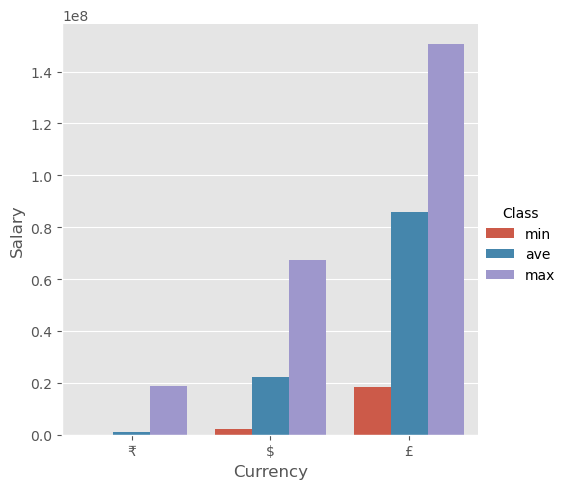

In [50]:
# fig, ax = plt.subplots(figsize=(6, 6))
sns.catplot(x="Currency", y='Salary', hue='Class', data=df, kind='bar')
# addlables(x="Currency", y='Salary')
plt.show()

In [51]:
sal.Location.unique()

array(['Bangalore', 'Pune', 'Hyderabad', 'New Delhi', 'Mumbai'],
      dtype=object)

In [52]:
# sal[sal['currency'].str[0] == '₹'].groupby(by='Job Title')['INR'].sum()

In [53]:
cities = list(sal['Location'].unique())

In [54]:
# we are gonna see the number of employees per role
d = sal.groupby('Job Title').sum()['Salaries Reported'].sort_values(ascending=False)
d

Job Title
Data Analyst                                4459.0
Data Scientist                              4387.0
Data Engineer                               2127.0
Machine Learning Engineer                    806.0
Data Science                                  50.0
Senior Data Scientist                         48.0
Machine Learning Data Associate               38.0
Senior Machine Learning Engineer              24.0
Junior Data Scientist                         20.0
Data Science Associate                         9.0
Machine Learning Data Associate I              9.0
Lead Data Scientist                            8.0
Machine Learning Associate                     6.0
Machine Learning Data Associate II             5.0
Data Science Consultant                        5.0
Associate Machine Learning Engineer            3.0
Machine Learning Data Analyst                  3.0
Machine Learning Scientist                     2.0
Machine Learning Consultant                    2.0
Machine Learning Deve

<AxesSubplot:ylabel='Job Title'>

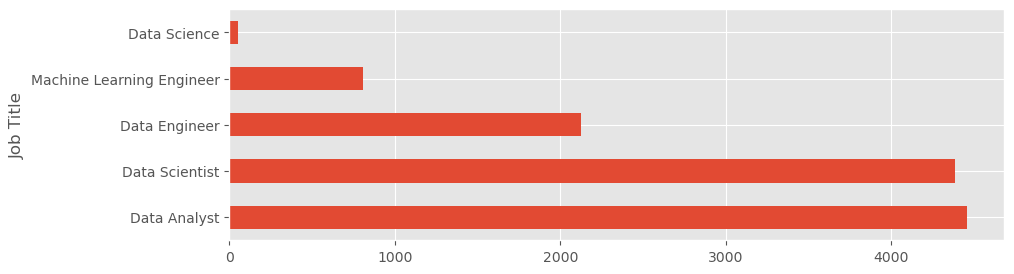

In [55]:
d.head().plot(figsize=(10,3), kind='barh')

In [56]:
sal.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,clean1,exchange,INR
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0,1.0,648573.0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0,1.0,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0,1.0,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0,1.0,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0,1.0,944110.0


<AxesSubplot:>

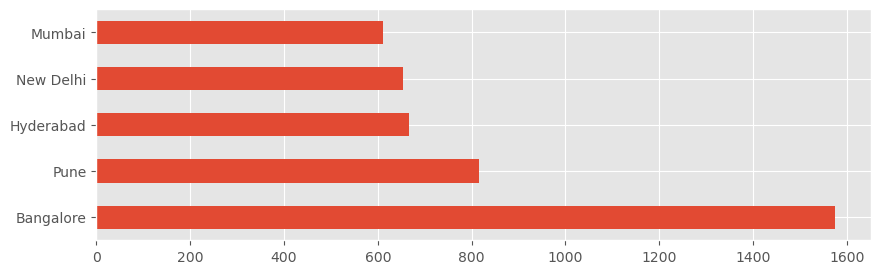

In [57]:
sal.Location.value_counts().plot(figsize=(10,3),kind='barh')

In [58]:
sal[sal['Location']=='Bangalore'].groupby('Job Title').sum()['Salaries Reported']

Job Title
Data Analyst                 1430.0
Data Engineer                 834.0
Data Scientist               2339.0
Machine Learning Engineer     280.0
Name: Salaries Reported, dtype: float64

AxesSubplot(0.125,0.11;0.775x0.77)


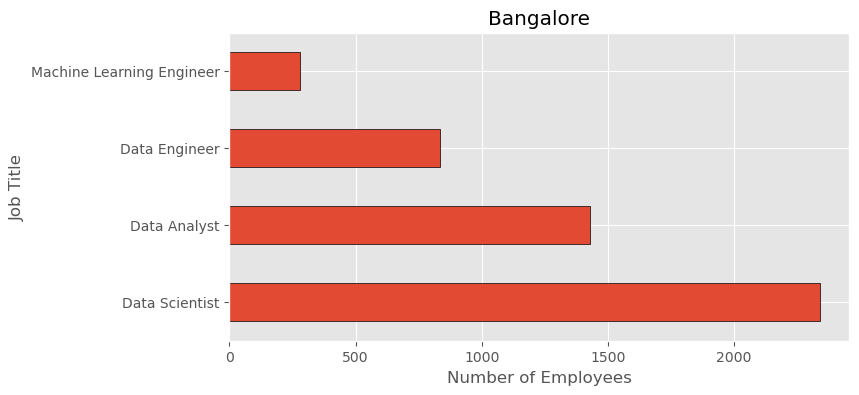

AxesSubplot(0.125,0.11;0.775x0.77)


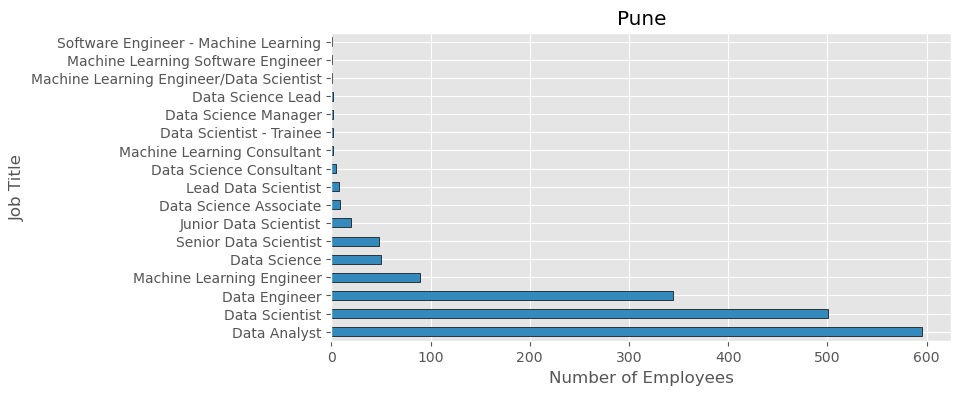

AxesSubplot(0.125,0.11;0.775x0.77)


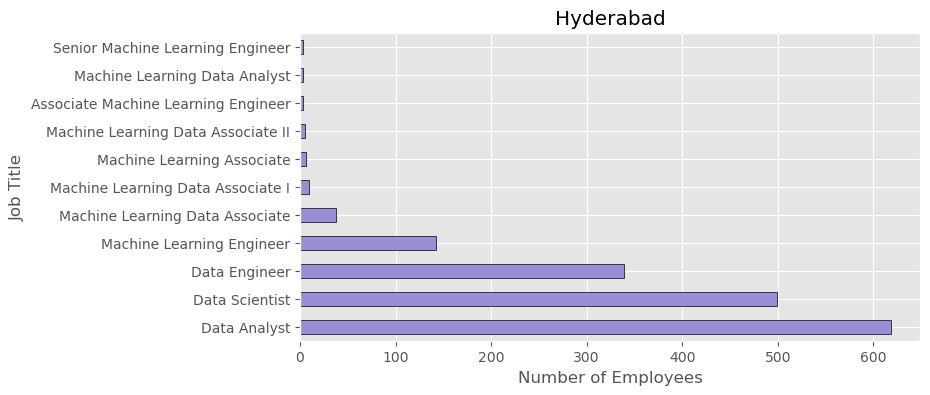

AxesSubplot(0.125,0.11;0.775x0.77)


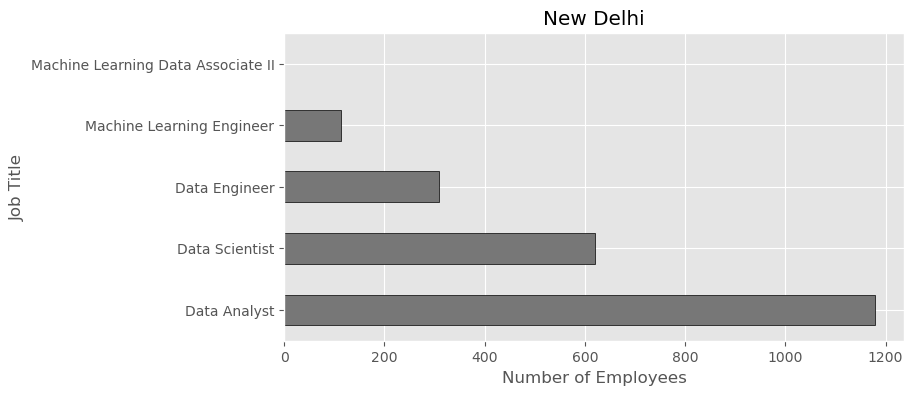

AxesSubplot(0.125,0.11;0.775x0.77)


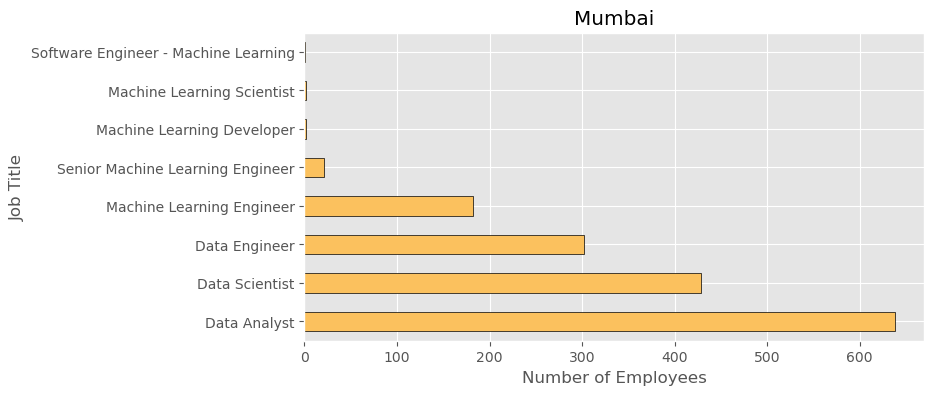

In [59]:
def by_cities(x):
    for i in x:
        g = sal[sal['Location']== i].groupby('Job Title') \
        .sum()['Salaries Reported'] \
        .sort_values(ascending=False) \
        .plot(figsize=(8,4), kind='barh',
              color=color_pal[x.index(i)],
              edgecolor='black',)
        print(g)
        plt.title(i)
        plt.xlabel('Number of Employees')
        plt.show()

by_cities(cities)

In [60]:
for i in x:
        dfc = sal[sal['Location']==i].groupby('Job Title').sum()
        dfc['City'] = (len(dfc)*(i,))
        dfc = dfc.drop(columns=['clean1','exchange','INR'])
dfc

,Salaries Reported,City
Job Title,,


In [61]:
# for i in x:
#     print(f"dfc_{i}")

In [62]:
def cities_df(x):
    df_list = []
    for i in x:
        dfc = sal[sal['Location']==i].groupby('Job Title').sum()
        dfc['City'] = (len(dfc)*(i,))
        dfc = dfc.drop(columns=['clean1','exchange','INR'])
        df_list.append(dfc.head(7))
        # print(df_list)
    concatenated_df = pd.concat(df_list, ignore_index=False)
    return concatenated_df
        
cities_df = cities_df(cities)
cities_df

,Salaries Reported,City
Job Title,,
Data Analyst,1430.0,Bangalore
Data Engineer,834.0,Bangalore
Data Scientist,2339.0,Bangalore
Machine Learning Engineer,280.0,Bangalore
Data Analyst,595.0,Pune
Data Engineer,344.0,Pune
Data Science,50.0,Pune
Data Science Associate,9.0,Pune
Data Science Consultant,5.0,Pune


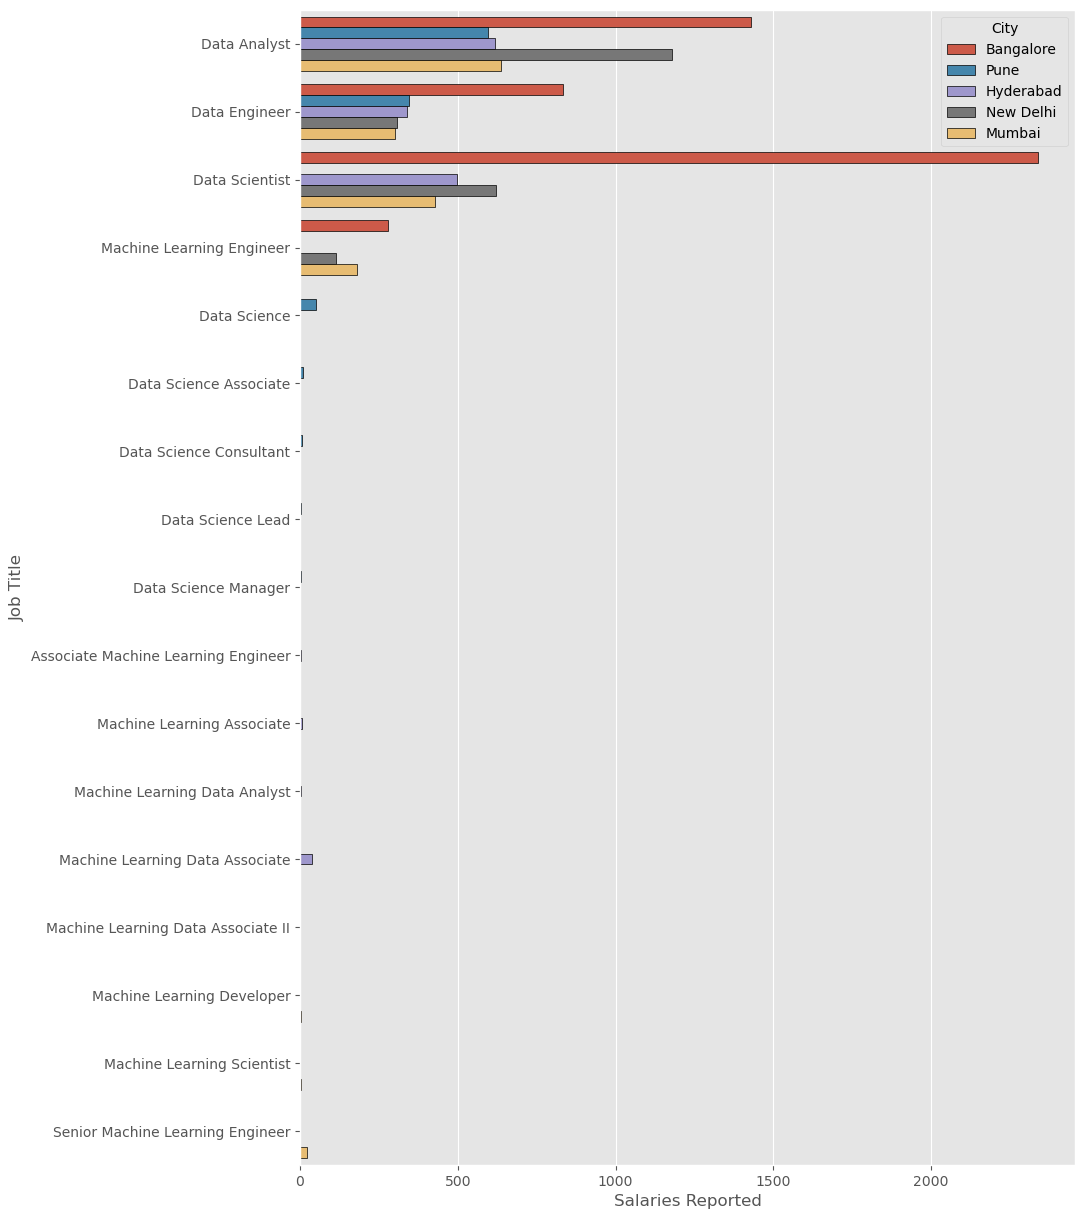

In [69]:
# fig, ax = plt.subplots(figsize=(6, 6))
plt.figure(figsize=(10,15))
g = sns.barplot(y=cities_df.index, x='Salaries Reported', hue='City', data=cities_df, edgecolor='black', )
# plt.xticks(rotation=45)
# g.set_xticklabels(rotation=90)
# addlables(x="Currency", y='Salary')
plt.show()

In [73]:
 for i in cities:
        dfc = sal[sal['Location']==i].groupby('Job Title').sum()
        dfc['City'] = (len(dfc)*(i,))
        
dfc

,Salaries Reported,clean1,exchange,INR,City
Job Title,,,,,
Data Analyst,638.0,102351590.0,195.0,102351590.0,Mumbai
Data Engineer,302.0,111007303.0,206.0,115360567.0,Mumbai
Data Scientist,428.0,212960974.0,598.0,345432748.0,Mumbai
Machine Learning Developer,2.0,1162238.0,2.0,1162238.0,Mumbai
Machine Learning Engineer,182.0,55240505.0,250.0,63491813.0,Mumbai
Machine Learning Scientist,2.0,340236.0,2.0,340236.0,Mumbai
Senior Machine Learning Engineer,21.0,7894503.0,6.0,7894503.0,Mumbai
Software Engineer - Machine Learning,1.0,1612324.0,1.0,1612324.0,Mumbai


In [105]:
ratio_df = pd.DataFrame(dfc['INR']/dfc['Salaries Reported'],columns=['Ratio']). \
           sort_values(by=["Ratio"], ascending=True)

In [116]:
def ratio_df(x):
    df_list = []
    for i in x:
        dfc = sal[sal['Location']==i].groupby('Job Title').sum()
        dfc['City'] = (len(dfc)*(i,))
        dfc['Ratio'] = (dfc['INR']/dfc['Salaries Reported']).sort_values(ascending=True)
        dfc = dfc.drop(columns=['clean1','exchange','INR'])
        df_list.append(dfc.head(7))
        # print(df_list)
    concat_ratio_df = pd.concat(df_list, ignore_index=False)
    return concat_ratio_df
        
ratio_df = ratio_df(cities)
ratio_df

,Salaries Reported,City,Ratio
Job Title,,,
Data Analyst,1430.0,Bangalore,9.070879e+04
Data Engineer,834.0,Bangalore,2.321544e+05
Data Scientist,2339.0,Bangalore,5.847052e+05
Machine Learning Engineer,280.0,Bangalore,6.019367e+05
Data Analyst,595.0,Pune,1.846063e+05
Data Engineer,344.0,Pune,6.647609e+05
Data Science,50.0,Pune,3.138186e+05
Data Science Associate,9.0,Pune,1.337681e+05
Data Science Consultant,5.0,Pune,5.342928e+05


In [117]:
ratio_df = ratio_df.drop('Machine Learning Data Associate II', axis=0)

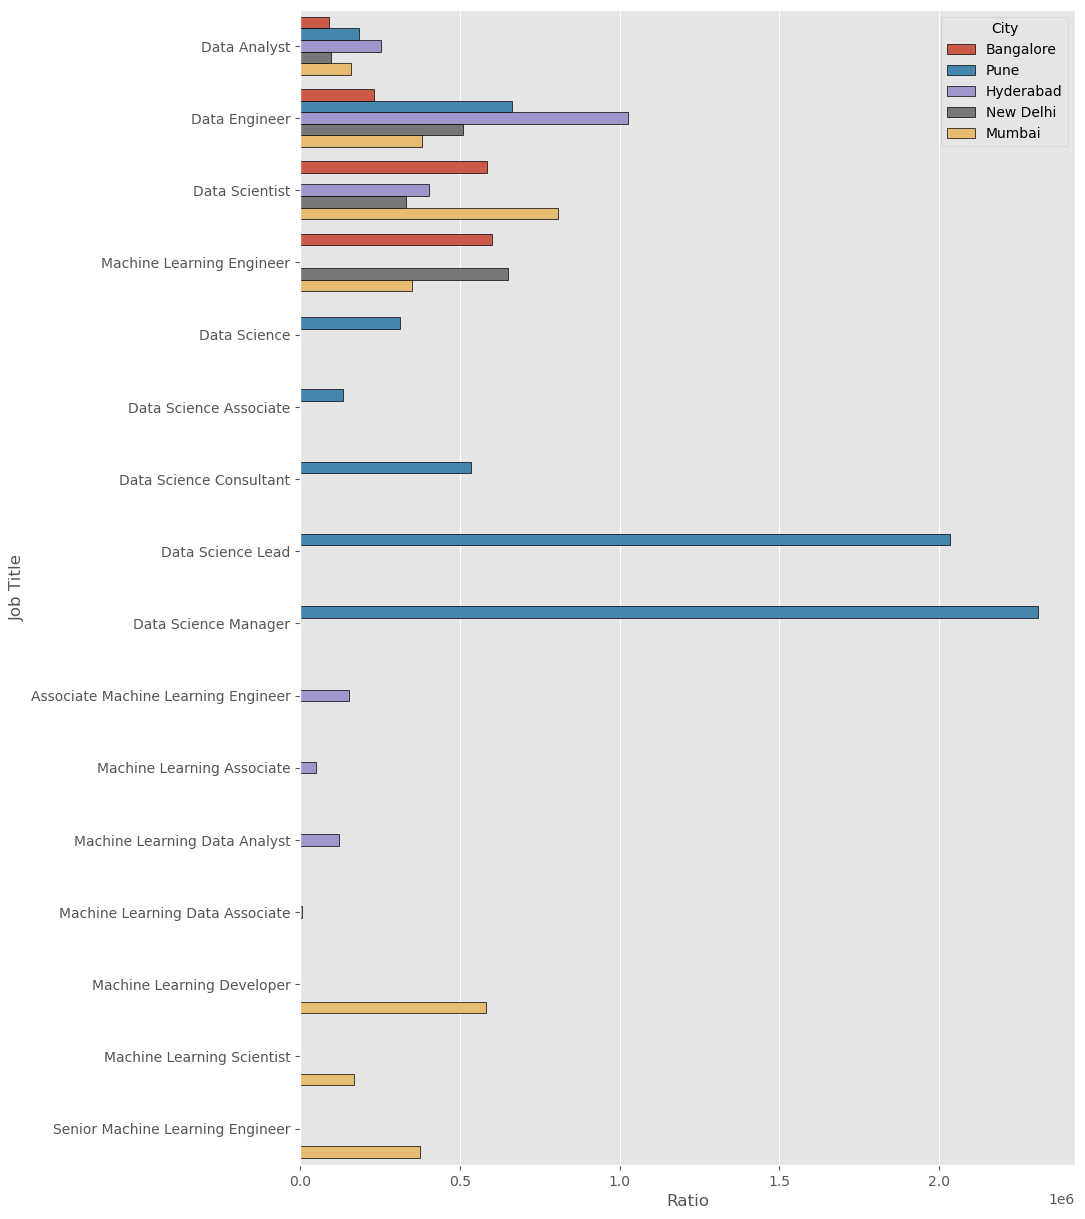

In [118]:
# ratio_df.plot(kind='barh', figsize=(9,5), edgecolor='black', )
plt.figure(figsize=(10,15))
g = sns.barplot(y=ratio_df.index, x='Ratio', hue='City', data=ratio_df, edgecolor='black', )
plt.show()

In [120]:
sal

,Company Name,Job Title,Salaries Reported,Location,Salary,currency,clean1,exchange,INR
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",₹,648573.0,1.0,648573.0
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",₹,1191950.0,1.0,1191950.0
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",₹,836874.0,1.0,836874.0
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",₹,669578.0,1.0,669578.0
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",₹,944110.0,1.0,944110.0
...,...,...,...,...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",₹,62160.0,1.0,62160.0
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr",₹,751286.0,1.0,751286.0
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr",₹,410952.0,1.0,410952.0
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr",₹,1612324.0,1.0,1612324.0
